**Nom du / des étudiant(s)** : Mamisoa RANDRIANARIMANANA- Xianxiang ZHANG

# TP image - filtrage

Dans ce TP, quelques images sont fournies, mais vous êtes fortement encouragés à récupérer et expérimenter sur d'autres images récupérées sur le web.

Les TP de traitement d'images sont réalisés en Python3, à l'aide de la librairie [scikit-image](http://scikit-image.org/docs/stable/). Les tableaux utilisés  (`ndarray`) par cette librairie pour manipuler les images proviennent de la librairie [numpy](https://docs.scipy.org/doc/). L'affichage des images et autres figures est réalisé grace à [plotly](https://plotly.com/python/). La documentation de ces trois librairies vous sera donc bien utile.

Dans ce TP, les questions seront indiquées dans un bloc **question**, et les réponses seront à donner dans le bloc **réponse**  situé en dessous du bloc de question. Vos réponses sont à rédiger en [markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). Vous pourrez ainsi répondre non seulement avec du texte, mais aussi avec des tableaux et des images.

Ce TP est à réaliser en deux séances d'1h30.

**Remarque importante:** Les questions posées dans ce TP requièrent généralement des <u>réponses courtes mais justifées</u>. Un simple oui ou non ne nous est d'aucune utilité pour juger de votre compréhension de la question et de sa réponse...

**Autre remarque:** Il y a parfois plusieurs sous-questions dans une même question. <u>Pensez a répondre à toutes les sous-questions</u>.


In [ ]:
# On importe tous les modules dont nous aurons besoin pour ce TP
import numpy as np  # pour les ndarray (donc les tableaux / matrices) et les convolutions
import scipy as sp  # pour la déconvolution
import plotly.express as px  # gestion des figures
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy import signal
from skimage import io,data,color # on charge le module permettant d'ouvrir des images

## La convolution en dimension 1 sur des petits exemples 

**Question 1:** 
- Faire le calcul de convolution $[1, 1, 1]*[1, 1, 1]$ à la main pour vérifier que ça donne bien ce que trouve la machine (donnez les détails du calcul dans la case réponse). 
- Ce filtre est-il **linéaire** ?

**Réponse 1**:

000111000  &

111000000 ->0

011100000 ->1

001110000 ->2

000111000 ->3

000011100 ->2

000001110 ->1

000000111 ->0

Donc le résultat est 0123210

Oui, ce filtre est donc linéaire.

Cette convolution nécessite de traiter un problème pas très intéressant mais inévitable : que fait-on quand le calcul de convolution fait appel à des valeurs du signal "hors de ses bornes", c.a.d. avant son début ou après sa fin ? On rencontrera le même problème en image, hors des bords de l'image. La fonction 'convolve' de scipy suppose que le signal vaut 0 hors de son domaine de définition, mais elle permet de choisir de donner (option 'full') ou pas (option 'valid') les résultats selon qu'ils font appel à des 0 introduits artificiellement sur les bords. L'option 'same' est un intermédiaire qui renvoie un résultat de même taille que le vecteur d'entrée. Les diverses manières de traiter cette question (qui n'est *pas* centrale au TP) amènent à des longueurs de vecteurs résultats qui diffèrent selon l'option choisie.

In [ ]:
a = np.array([1, 1, 1])
c = np.convolve(a,a,'valid')
print(c)
c = np.convolve(a,a,'same')
print(c)
c = np.convolve(a,a,'full')
print(c)

[3]
[2 3 2]
[1 2 3 2 1]


Le vecteur `[1, 1, 1]` est souvent nommé "filtre **moyenneur**". En toute rigueur, il faudrait utiliser le filtre $\frac{1}{3}$`[1, 1, 1]` qui, convolué avec un signal, calcule une moyenne glissante sur ce signal. Examinons l'effet de la convolution d'un tel filtre avec  convolution d'une forte **discontinuité** par un filtre [1 1 1].

In [ ]:
marche_escalier = np.array([0, 0, 0, 0, 0, 0, 10, 10, 10, 10, 10, 10])
escalier_lisse = np.convolve(marche_escalier, a, mode='full')
print(escalier_lisse)


[ 0  0  0  0  0  0 10 20 30 30 30 30 20 10]


### Associativité

**Question 2:** Est-ce que (a$*$a)$*$marche_escalier = a$*$(a$*$marche_escalier) ?

**Réponse 2:** Oui.
Nous pouvons conclure dans le résultat du code ci-dessous.



In [ ]:
print( np.convolve(escalier_lisse, a, mode='full') )
print( np.convolve(marche_escalier,c, mode='full') )

[ 0  0  0  0  0  0 10 30 60 80 90 90 80 60 30 10]
[ 0  0  0  0  0  0 10 30 60 80 90 90 80 60 30 10]


**Question 3:** Quel intérêt à cette propriété, si on considère l'application successive de deux convolutions à un signal ?

**Réponse 3:** Grâce aux résultats du code, on peut en déduire que nous pouvons étendre la haute fréquence du signal à travers ces deux convolutions pour rendre la fluctuation du signal plus évidente.

### Commutativité
On vérifie que a$*$marche_escalier=marche_escalier$*$a

In [ ]:
print( np.convolve (marche_escalier, a))
print( np.convolve (a, marche_escalier))

[ 0  0  0  0  0  0 10 20 30 30 30 30 20 10]
[ 0  0  0  0  0  0 10 20 30 30 30 30 20 10]


De la commutativité,

**Question 4:**
* que conclure quant aux rôles de "filtre" et de "signal" quand on filtre un signal ?
* que conclure quant à l'ordre dans lequel on applique deux filtrages successifs sur un signal ?

**Réponse 4:** Le filtre est un dispositif sélectif en fréquence qui laisse passer certaines composantes de fréquence dans un signal tout en atténuant considérablement d'autres composantes de fréquence. En utilisant cette fonction de sélection de fréquence de filtre, le bruit d'interférence peut être filtré ou une analyse de spectre peut être effectuée.

Le signal est une autre représentation d'un pixel d'image, et différentes couleurs d'une image peuvent être décomposées en signaux de différentes couleurs.

L'image peut obtenir l'effet de deux filtres à travers un filtre complexe, et le filtre de l'image est linéaire

### Déconvolution

L'opération de convolution ci-dessus peut être **réversible**, en particulier si on connait l'un des deux termes de la convolution. On se contentera de considérer cette fonction de déconvolution comme une boite noire. On reviendra, à la fin du TP, sur le cas 
où on ne connait aucun des deux termes de la convolution, dont la résolution est généralement complexe et approximative, mais riche d'applications.

In [ ]:
escalier_deconvolue, e = sp.signal.deconvolve(escalier_lisse,a)
print(escalier_deconvolue)


[ 0.  0.  0.  0.  0.  0. 10. 10. 10. 10. 10. 10.]


### Convolution répétée

Un point intéressant mais que nous ne traiterons que superficiellement ici : si on répète souvent la convolution d'un vecteur quelconque par `[1/3 1/3 1/3]`, le résultat tend vers une gaussienne. On peut aller cherche une explication du coté du [théorème central limite](https://fr.wikipedia.org/wiki/Théorème_central_limite).

In [ ]:
a = np.random.rand(50) # vecteur aléatoire de taille 50
b = np.copy(a)
for x in range(250):
    b = np.convolve(b,[1/3, 1/3, 1/3])

fig = make_subplots(rows=1, cols=2, subplot_titles=("Vecteur de départ", "Après convolutions multiples"))
fig.add_trace( go.Scatter(y=a), row=1, col=1 )
fig.add_trace( go.Scatter(y=b), row=1, col=2 )

## Toujours des petits exemples, mais en dimension 2

* Vérifier ci-dessous qu'on peut construire un filtre bi-dimensionnel en convoluant un filtre horizontal avec un filtre vertical
* Observer le résultat de la convolution du filtre bidimensionnel ainsi créé avec lui-même 

In [ ]:
a = np.array([[1, 1, 1]])
print("a=",a)
b = np.transpose(a)
print("b=",b)
c = sp.signal.convolve2d(a,b)
print("c=",c)
d= sp.signal.convolve2d(c,c)
print("d=",d)

a= [[1 1 1]]
b= [[1]
 [1]
 [1]]
c= [[1 1 1]
 [1 1 1]
 [1 1 1]]
d= [[1 2 3 2 1]
 [2 4 6 4 2]
 [3 6 9 6 3]
 [2 4 6 4 2]
 [1 2 3 2 1]]


Remarquer que si on continuait à convoluer le résultat avec `c`, on tendrait vers un filtre gaussien. Ci-dessous, affichons une distribution gaussienne pour s'en rappeller l'allure. Le point de vue 3D est modifiable à la souris sur la figure.

In [ ]:
xgv = np.arange(-2, 2, 0.1)
ygv = np.arange(-2, 2, 0.1)
[X,Y] = np.meshgrid(xgv, ygv)
V = np.exp(-(X**2 + Y**2))  #On ne met pas le terme de normalisation car c'est juste pour voir la forme de la fonction

fig = go.Figure(data=[go.Surface(x=X, y=Y, z=V)])
fig.update_layout( title_text="Exemple de filtre gaussien bidimensionnel", title_x=0.5)
fig.show()

## Filtrage gaussien

On évalue maintenant la capacité du filtrage gaussien à réduire le bruit dans une image. Cette évaluation sera faite en terme de qualité d'image perçue.
* l'image `noisy1` subit un bruit de type "poivre et sel" (non additif)
* l'image `noisy2` subit un bruit gaussien (! ça n'a rien à voir avec le filtrage gaussien ! )



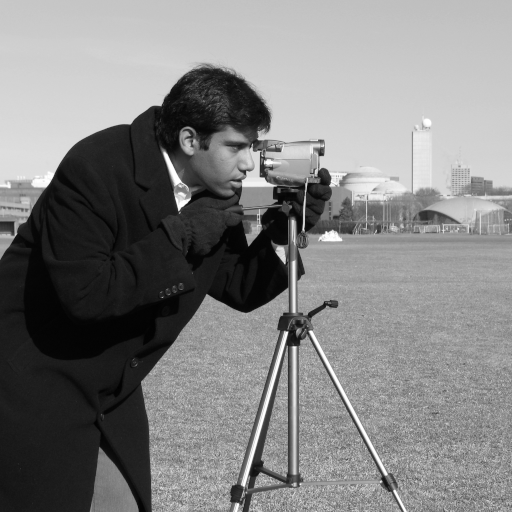
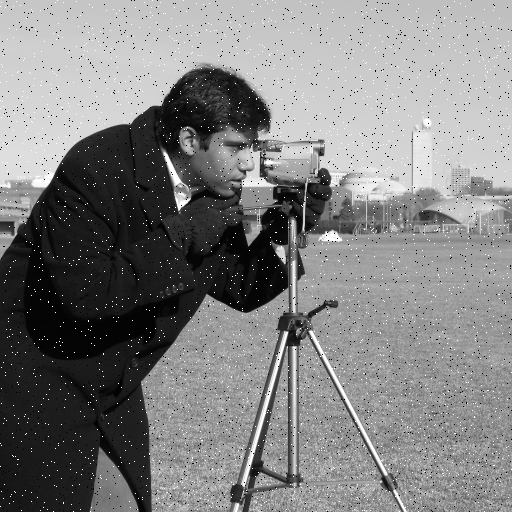
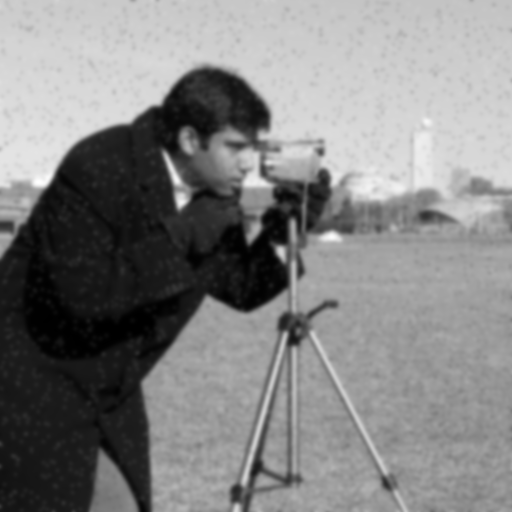

Rapport signal / bruit de l'image 1 bruitée: 7.98 db
Rapport signal / bruit de l'image 1 débruitée: 15.98 db


In [ ]:
# Manipulations de noisy1 avec du bruit poivre et sel
from skimage import util,filters
import math

im = data.camera()
seuil = 0.01

def add_salt_and_pepper_noise(clean_image, seuil):
    noise = np.random.random(clean_image.shape)
    noisy_image=clean_image.copy()
    noisy_image[noise > 1-seuil] = 255
    noisy_image[noise < seuil] = 0
    return(noisy_image)

filtered = filters.gaussian(im, sigma =2)

noisy1=add_salt_and_pepper_noise(im, seuil)
filtered1 = filters.gaussian(noisy1, sigma =2)
noise1 = noisy1-im
noise_after_filter1=filtered1-filtered

# Affichage des 3 images
fig = make_subplots(rows=1, cols=3, subplot_titles=("image de départ", "image bruitée", "image filtrée"))
sub = px.imshow(im, binary_string=True)
fig.add_trace( sub.data[0], row=1, col=1)
sub = px.imshow(noisy1, binary_string=True)
fig.add_trace( sub.data[0], row=1, col=2)
sub = px.imshow(filtered1, binary_string=True)
fig.add_trace( sub.data[0], row=1, col=3)
fig.show()

print("Rapport signal / bruit de l'image 1 bruitée: {:.2f} db".format(10*math.log10(im.mean()/noise1.std())))
print("Rapport signal / bruit de l'image 1 débruitée: {:.2f} db".format(10*math.log10(filtered1.mean()/noise_after_filter1.std())))


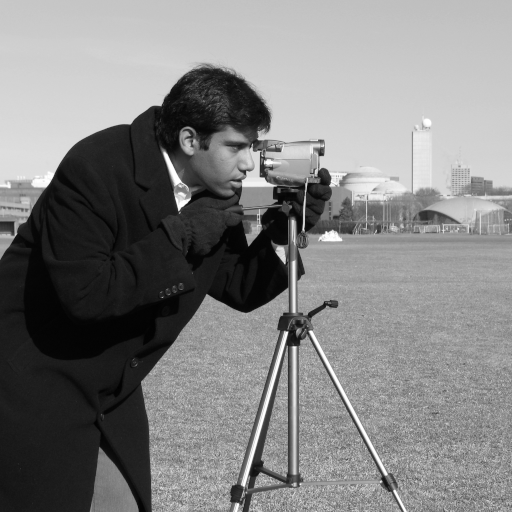


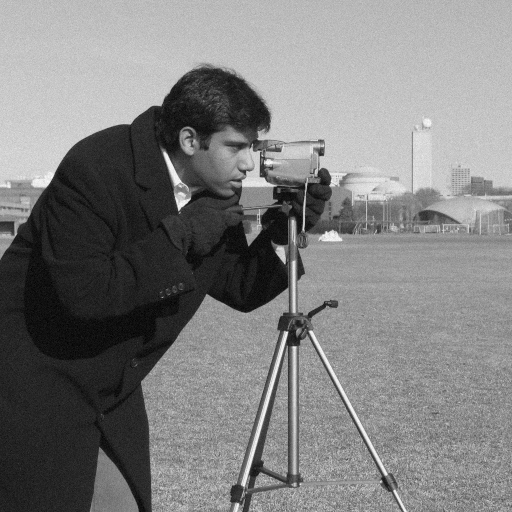
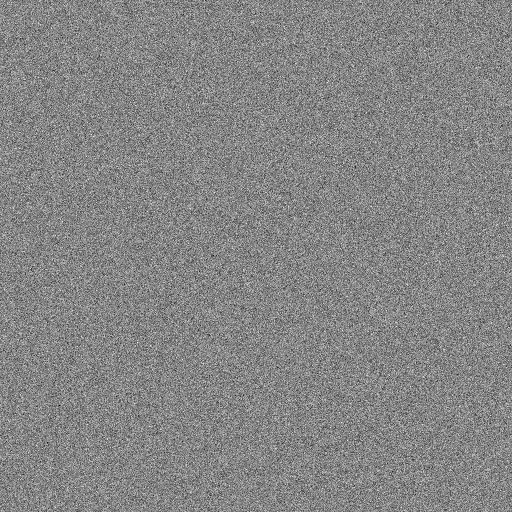


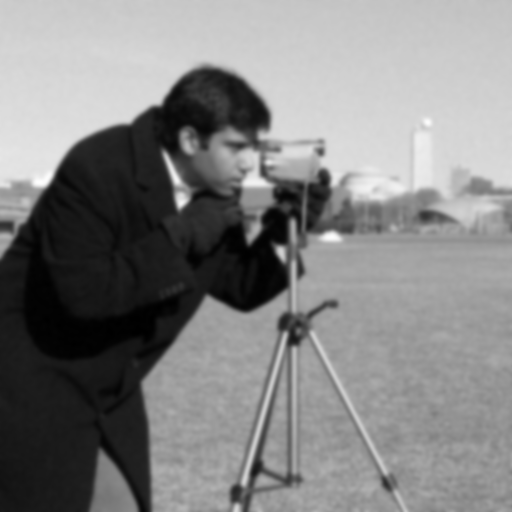
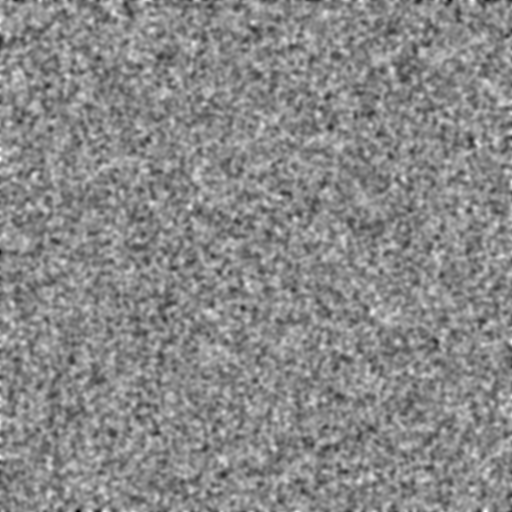

Ecart type du bruit gaussien: 5.0921
Ecart type du bruit gaussien filtré: 0.7204
Rapport signal / bruit de l'image bruitée: 14.04 db
Rapport signal / bruit de l'image débruitée: 22.53 db


In [ ]:
# Maniupulations de noisy2 avec du bruit gaussien 
import math

noise_std = 0.02

noise2 = np.random.normal(loc=0.0, scale=noise_std, size=im.shape)*255
noisy2 = im.copy() + noise2
noisy2.clip(0,255)
filterednoise2 = filters.gaussian(noise2, sigma = 2)
filtered2 = filters.gaussian(noisy2, sigma = 2)

# Affichage des images
fig = make_subplots(rows=1, cols=2, subplot_titles=("image de départ", ""))
sub = px.imshow(im, binary_string=True)
fig.add_trace( sub.data[0], row=1, col=1)
fig.show()
fig = make_subplots(rows=1, cols=2, subplot_titles=("image bruitée", "bruit gaussien" ))
sub = px.imshow(noisy2, binary_string=True)
fig.add_trace( sub.data[0], row=1, col=1)
sub = px.imshow(noise2, binary_string=True)
fig.add_trace( sub.data[0], row=1, col=2)
fig.show()
fig = make_subplots(rows=1, cols=2, subplot_titles=("image filtrée", "bruit gaussien filtré"))
sub = px.imshow(filtered2, binary_string=True)
fig.add_trace( sub.data[0], row=1, col=1)
sub = px.imshow(filterednoise2, binary_string=True)
fig.add_trace( sub.data[0], row=1, col=2)
fig.show()

print("Ecart type du bruit gaussien: {:.4f}".format(np.std(noise2)))
print("Ecart type du bruit gaussien filtré: {:.4f}".format(np.std(filterednoise2)))
print("Rapport signal / bruit de l'image bruitée: {:.2f} db".format(10*math.log10(im.mean()/noise2.std())))
print("Rapport signal / bruit de l'image débruitée: {:.2f} db".format(10*math.log10(filtered2.mean()/filterednoise2.std())))


**Question 5:**
* Expérimentez avec diverses valeur de `seuil`, probabilité d'avoir du bruit poivre et sel, et `noise_std`, écart-type du bruit gaussien, pour en évaluer l'effet sur la préservation de l'image et l'atténuation du bruit. Commentez ensuite vos résultats. 
* Quels sont les types d'éléments de l'image qui souffrent le plus du filtrage gaussien ? 
* Le filtrage gaussien vous semble-t-il aussi efficace sur les deux types de bruit ?


**Réponse 5:** 
On peut constater que plus le seuil est grand plus le flou appliqué à l'image sera marqué, le filtrage permet d’éliminer les “hautes” fréquences dans l’image et limite donc les fluctuations rapides de l’illuminance
L’idée derrière le filtrage gaussien (ou le simple filtre moyenneur) est que
des pixels voisins dans l’espace image ont des illuminances voisines.
• L’hypothèse est donc faite que l’illuminance varie lentement et qu’un
moyennage spatial permet de réduire le bruit.
• Si l’hypothèse de variation lente de l’illuminance n’est pas respectée
(comme sur les arêtes des images correspondant aux changements rapides
de l’illuminance), le moyennage adoucit ces discontinuités, ce qui n’est pas
idéal

**Question 6:** Concernant le bruit gaussien, en considérant que le bruit est additif c.a.d. que $Image_{bruitee}=Image_{originale}+Image_{bruit}$, appliquez la distributivité de la convolution sur la formule $Image_{bruitee}*Filtre$ et interprétez (c'est une question théorique, aucune manipulation complémentaire à effectuer)


**Réponse 6:** Ici on a $Image_{bruitee}=Image_{originale}+Image_{bruit}$ , en aura alors  $Image_{bruitee}*Filtre = (Image_{originale}+Image_{bruit}*Filtre) = (Image_{originale}*Filtre) + (Image_{bruit}*Filtre) $

La convolution ici permet soit de lisser soit de renforcer le contour ou encore le détécter dans le cas d'un filtre Laplacien.

## Préserver les discontinuités : le filtrage bilatéral

Le filtrage ci-dessous réalise un filtre moyenneur avec une propriété particulière : seuls les éléments du voisinage dont l'intensité diffère peu du point de référence sont pris en compte dans le filtrage.

**Question 7:**
* Le filtrage est-il toujours linéaire ? 
* Le filtrage peut-il encore s'exprimer comme une convolution ? Et donc l'associativité, commutativité, distributivité etc ?

**Réponse 7:** Non, le filtrage est non-linéaire. La convolution sera exprimé différemment et il ne respecte pas les propriétés de commutativité et d’associativité du filtre linéaire. 

In [ ]:
from skimage.filters.rank import mean_bilateral
from skimage.morphology import disk 

noisy1= util.random_noise(im, mode='gaussian', var= 0.001)
filtered1 = mean_bilateral(noisy1, disk(20), s0=30, s1=30)
noisy2= util.random_noise(im, mode='gaussian', var= 0.005)
filtered2 = mean_bilateral(noisy2, disk(20), s0=50, s1=50)
noisy3= util.random_noise(im, mode='gaussian', var= 0.01)
filtered3 = mean_bilateral(noisy3, disk(20), s0=50, s1=50)
#filtered3b = mean_bilateral(filtered3, disk(20), s0=20, s1=20)
noisy4= util.random_noise(im, mode='gaussian', var= 0.05)
filtered4 = mean_bilateral(noisy4, disk(20), s0=100, s1=100)

fig = make_subplots(rows=1, cols=4)
fig.add_trace( px.imshow(noisy1, binary_string=True).data[0], row=1, col=1)
fig.add_trace( px.imshow(noisy2, binary_string=True).data[0], row=1, col=2)
fig.add_trace( px.imshow(noisy3, binary_string=True).data[0], row=1, col=3)
fig.add_trace( px.imshow(noisy4, binary_string=True).data[0], row=1, col=4)
fig.update_layout( title_text="images bruitées", title_x=0.5)
fig.show()

fig = make_subplots(rows=1, cols=4)
fig.add_trace( px.imshow(filtered1, binary_string=True).data[0], row=1, col=1)
fig.add_trace( px.imshow(filtered2, binary_string=True).data[0], row=1, col=2)
fig.add_trace( px.imshow(filtered3, binary_string=True).data[0], row=1, col=3)
fig.add_trace( px.imshow(filtered4, binary_string=True).data[0], row=1, col=4)
fig.update_layout( title_text="images filtrées", title_x=0.5)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Question 8:**
* Les expériences ci-dessus examinent la capacité d'un tel filtre à restaurer une image bruitée avec un bruit gaussien, pour diverses valeurs de bruit et de seuil de "diffère peu" évoqué ci-dessus. Les résultats sont-ils meilleurs que pour le filtrage gaussien ?

**Réponse 8:** Le but d'un filtrage non linéaire est de réduire le bruit impulsionnel que le filgtrage gaussienne n’arrive pas à faire. Il préserve mieux ainsi les discontinuités. 
L’idée derrière le filtrage gaussien est que des pixels voisins dans l’espace image ont des illuminances voisines et que l’illuminance varie lentement. Si l’hypothèse de variation lente de l’illuminance n’est pas respecté, le moyennage adoucit ces discontinuités, ce qui n’est pas
idéal. Le filtre bilatéral tente de compenser ces défaillances en repensant la
notion de proximité entre les pixels sans avoir recours à un processus
itératif
Cependant il est généralement plus coûteux en temps calcul .

## Filtrage median 

On évalue ci-dessous la capacité du filtrage médian à réduire le bruit. Cette évaluation sera faite en terme de qualité d'image perçue et pourra être comparée aux résultats des techniques précédentes.
On peut régler deux paramètres 
* la quantité de bruit
* la taille du disque


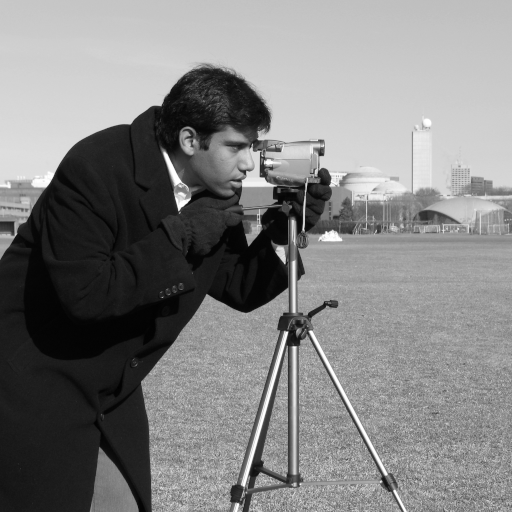
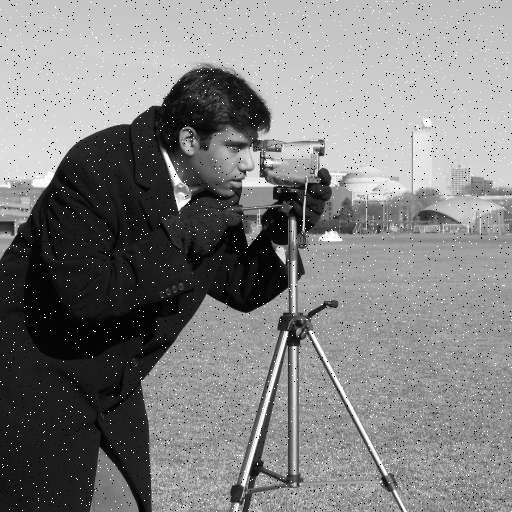
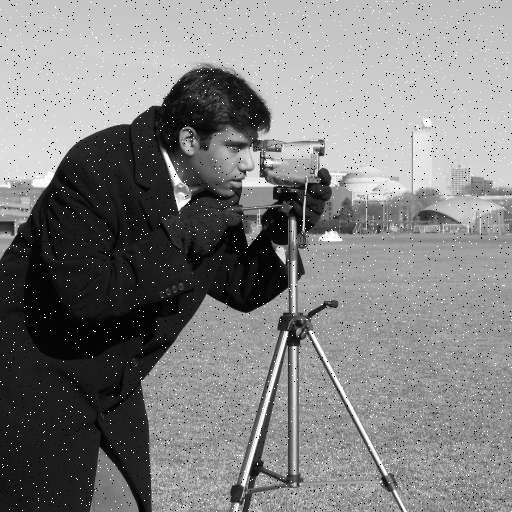
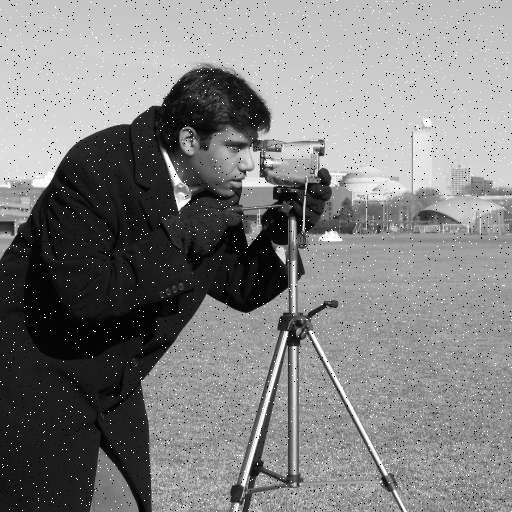
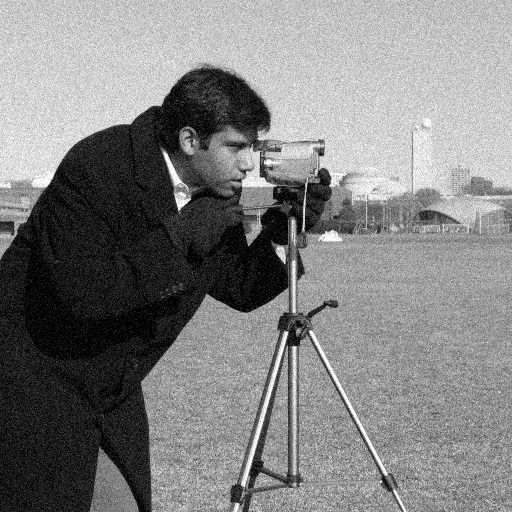


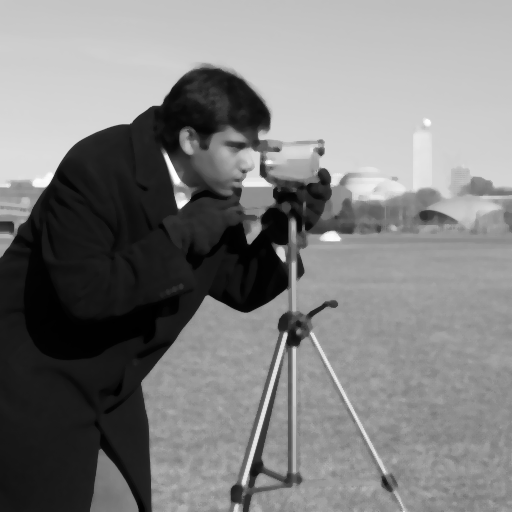
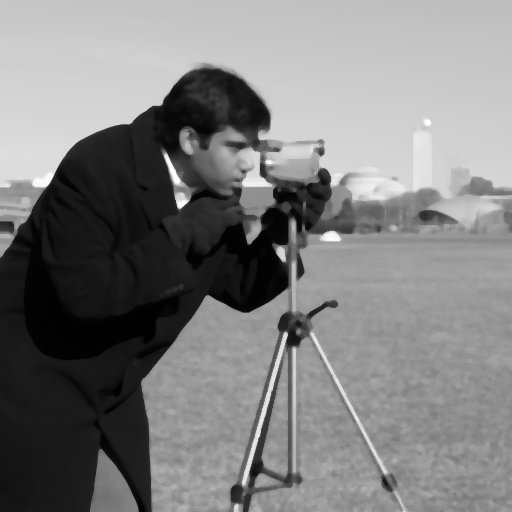
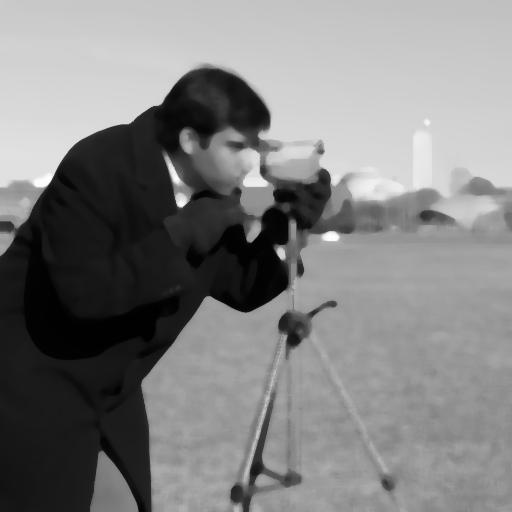
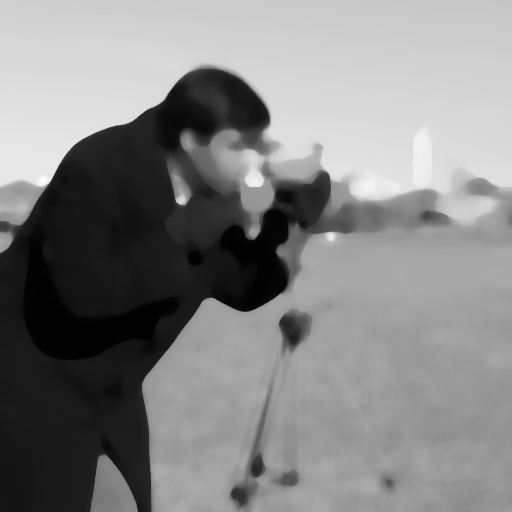
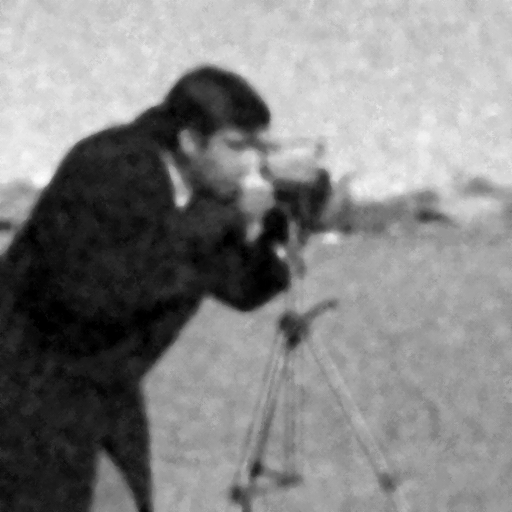

In [ ]:
from skimage.filters.rank import median

seuil = 0.01

im = data.camera()

noisy_image=add_salt_and_pepper_noise(im,seuil)
filtered1 = median(im, disk(3))
filtered2 = median(noisy_image, disk(3))
filtered3 = median(noisy_image, disk(5))
filtered4 = median(noisy_image, disk(9))

noisy_gaussian= util.random_noise(im, mode='gaussian', var= 0.003)
filtered_gaussian = median(noisy4, disk(7))

fig = make_subplots(rows=1, cols=5)
fig.add_trace( px.imshow(im, binary_string=True).data[0], row=1, col=1)
fig.add_trace( px.imshow(noisy_image, binary_string=True).data[0], row=1, col=2)
fig.add_trace( px.imshow(noisy_image, binary_string=True).data[0], row=1, col=3)
fig.add_trace( px.imshow(noisy_image, binary_string=True).data[0], row=1, col=4)
fig.add_trace( px.imshow(noisy_gaussian, binary_string=True).data[0], row=1, col=5)
fig.update_layout( title_text="images bruitées", title_x=0.5)
fig.show()

fig = make_subplots(rows=1, cols=5)
fig.add_trace( px.imshow(filtered1, binary_string=True).data[0], row=1, col=1)
fig.add_trace( px.imshow(filtered2, binary_string=True).data[0], row=1, col=2)
fig.add_trace( px.imshow(filtered3, binary_string=True).data[0], row=1, col=3)
fig.add_trace( px.imshow(filtered4, binary_string=True).data[0], row=1, col=4)
fig.add_trace( px.imshow(filtered_gaussian, binary_string=True).data[0], row=1, col=5)
fig.update_layout( title_text="images filtrées", title_x=0.5)
fig.show()

**Question 9:** Commentez les performance du filtrage médian pour la réduction de bruit poivre et sel en fonction des différents paramètres que l'on peut faire varier (quantité de bruit, taille du disque). Faites en particulier le lien avec les performances du filtrage gaussien pour ce même type de bruit.


**Réponse 9:** VOTRE REPONSE ICI

## Faire du flou, c'est bien, l'enlever c'est mieux : la déconvolution

Cette section évoque, en l'utilisant comme boite noire, la tâche de déconvolution aveugle. Le code procède comme suit :
* on charge une image contenant du texte (ça pourrait être autre chose !)
* on lui applique du flou (PSF = point spread function), par exemple selon une direction et amplitude que nous choisissons
* on ajoute un peu de bruit
* on cherche alors à récupérer l'image initiale (notez que la déconvolution n'est pas totalement faite à l'aveugle puisqu'on fournit la PSF)

Pas de question sur cet exercice, mais une occasion de constater que la déconvolution n'est pas une tâche triviale dès lors que le signal qu'on traite est bruité (ce qui est toujours le cas dans la "vraie vie" :-))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration

image = color.rgb2gray(color.rgba2rgb(io.imread('image-texte.png')))  # Image originale : elle est nette

from scipy.signal import convolve2d as conv2

psf = np.ones((1, 20)) / (1*20) # Vecteur de "mouvement" 

image = conv2(image, psf, 'same', 'symm') # Convolution, qui floute l'image

image += 0.25 * image.std() * np.random.standard_normal(image.shape) #On ajoute un peu de bruit

deconvolved, _ = restoration.unsupervised_wiener(image, psf)

fig = make_subplots(rows=1, cols=2, subplot_titles=("image d'entrée (floue et bruitée)", "image déconvoluée"))
fig.add_trace( px.imshow(image, binary_string=True).data[0], row=1, col=1)
fig.add_trace( px.imshow(deconvolved, binary_string=True).data[0], row=1, col=2)
fig.show()

FileNotFoundError: ignored

## Pour en savoir plus.... 

Dans un notebook ipython, on peut également ajouter des widgets pour plus régler directement les paramètres des algorithmes à partir de composants graphiques.

* Diverses librairies comme Bokeh (http://bokeh.pydata.org)
* ou voir par ex. Conference Pydata 2016 : https://www.youtube.com/watch?v=eVET9IYgbao